<a href="https://colab.research.google.com/github/BustamJos3/ia4eng_jdbs_afmp_project/blob/main/01-exploracion-de-datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Charge data for Forest Cover

In [9]:
#modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from zipfile import ZipFile
import seaborn as sns

In [ ]:
#call API
!pip install kaggle
#upload kaggle token .json
from google.colab import files
files.upload()

In [2]:
#Make a directory named kaggle and copy the kaggle.json file there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json
#API from forest cover dataset
!kaggle competitions download -c forest-cover-type-prediction
#API from forest cover dataset
!kaggle competitions download -c forest-cover-type-prediction
#unzip files
file_name = 'forest-cover-type-prediction.zip' #the file is the dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

 36% 9.00M/25.3M [00:00<00:00, 29.5MB/s]
100% 25.3M/25.3M [00:00<00:00, 70.3MB/s]
forest-cover-type-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)
Done


# Data exploration

In [36]:
#create DF from train
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


## Nan values induction

In [4]:
df_count_nan=df_train.isna().sum()
df_count_nan[df_count_nan!=0]

Series([], dtype: int64)

## Inspect target variable

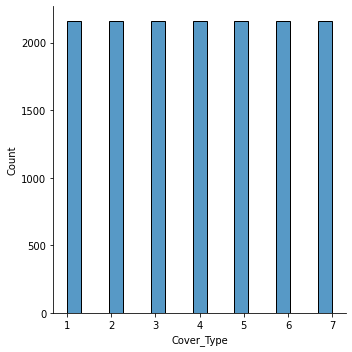

In [16]:
#plot target column (categorical)
sns.displot(df_train['Cover_Type']);

## Discover data types

In [15]:
# cols of train
df_train.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [17]:
# get the type values of every col
for c in df_train.columns:
    print ("%20s"%c, df_train[c].dtype)

                  Id int64
           Elevation int64
              Aspect int64
               Slope int64
Horizontal_Distance_To_Hydrology int64
Vertical_Distance_To_Hydrology int64
Horizontal_Distance_To_Roadways int64
       Hillshade_9am int64
      Hillshade_Noon int64
       Hillshade_3pm int64
Horizontal_Distance_To_Fire_Points int64
    Wilderness_Area1 int64
    Wilderness_Area2 int64
    Wilderness_Area3 int64
    Wilderness_Area4 int64
          Soil_Type1 int64
          Soil_Type2 int64
          Soil_Type3 int64
          Soil_Type4 int64
          Soil_Type5 int64
          Soil_Type6 int64
          Soil_Type7 int64
          Soil_Type8 int64
          Soil_Type9 int64
         Soil_Type10 int64
         Soil_Type11 int64
         Soil_Type12 int64
         Soil_Type13 int64
         Soil_Type14 int64
         Soil_Type15 int64
         Soil_Type16 int64
         Soil_Type17 int64
         Soil_Type18 int64
         Soil_Type19 int64
         Soil_Type20 int64
        

## Inspect numeric cols

In [19]:
# head description of df_train
df_train._get_numeric_data().describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Id,15120.0,7560.500000,4364.912370,1.0,3780.75,7560.5,11340.25,15120.0
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.00,2752.0,3104.00,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.00,126.0,261.00,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.00,15.0,22.00,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.00,180.0,330.00,1343.0


In [20]:
# tail description of df_train
df_train._get_numeric_data().describe().T.tail()

,count,mean,std,min,25%,50%,75%,max
Soil_Type37,15120.0,0.002249,0.047368,0.0,0.0,0.0,0.0,1.0
Soil_Type38,15120.0,0.048148,0.214086,0.0,0.0,0.0,0.0,1.0
Soil_Type39,15120.0,0.043452,0.203880,0.0,0.0,0.0,0.0,1.0
Soil_Type40,15120.0,0.030357,0.171574,0.0,0.0,0.0,0.0,1.0
Cover_Type,15120.0,4.000000,2.000066,1.0,2.0,4.0,6.0,7.0


### Correlation matrix

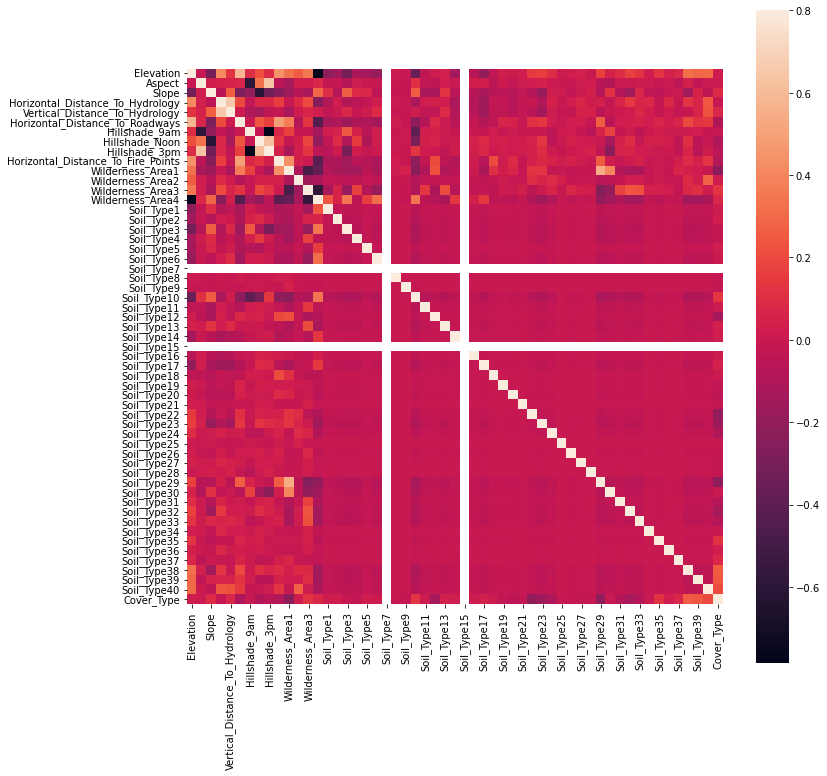

In [47]:
#correlation matrix
corrmat = df_train.corr().loc['Elevation':,'Elevation':]
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

In [55]:
# get cols with correlation greater than .1 except 'Cover_Type'
most_corr_cols=list(corrmat['Cover_Type'][corrmat['Cover_Type']>.1].index)
most_corr_cols

['Wilderness_Area3',
 'Soil_Type10',
 'Soil_Type35',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40',
 'Cover_Type']

#### Problem:
The correlation is too low $⟶$ what do we need to do?

### Pairplot between the most correlated cols

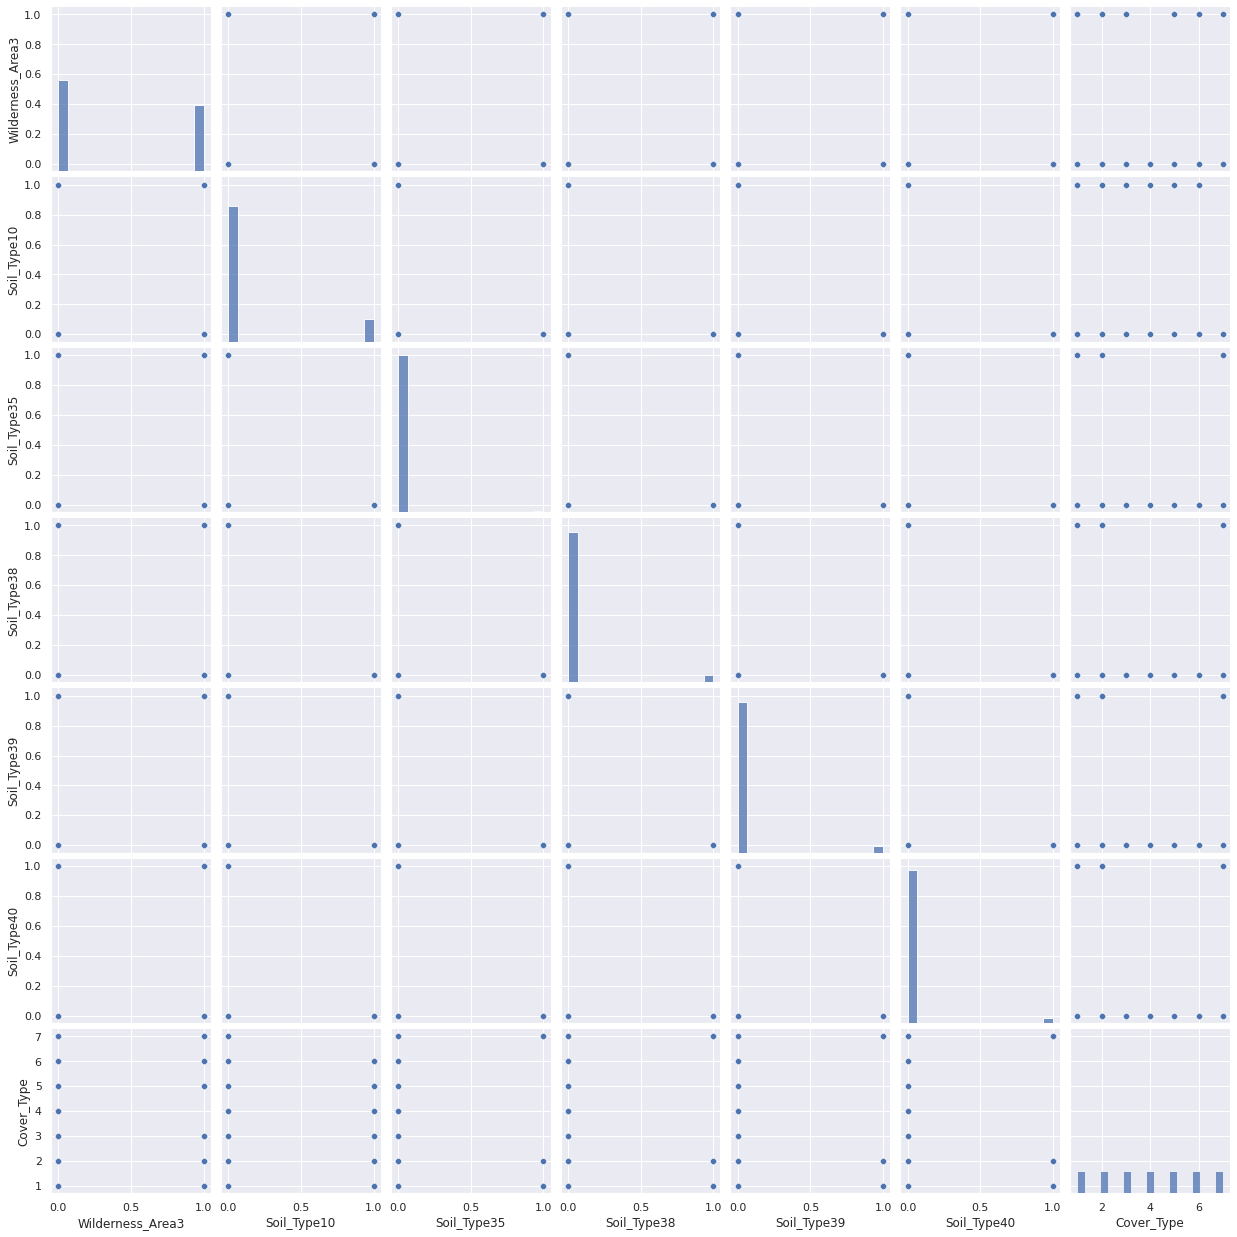

In [56]:
# pairplot between cols
sns.set()
sns.pairplot(df_train[most_corr_cols])